In [ ]:
install.packages("ggplot2")
install.packages("infotheo")
install.packages("carData")
install.packages("forecast")
install.packages("psych")
install.packages("TSA")
install.packages("chron")
install.packages("caTools")
install.packages("caret")
install.packages('car')
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘pbkrtest’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(carData)
library(magrittr)
library(dplyr)
library(tidyr)
library(infotheo)
library(forecast)
library(MASS)
library(psych)
library(TSA)
library(forecast)
library(chron)
library(caTools)
library(caret)
library(ggplot2)
library(car)
library(corrplot)



Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


corrplot 0.95 loaded



# 1. Model 1
Model 1 is a multiple linear regression model predicting bike rental demand for every hour using hourly weather conditions. For this model, the dataset is used as it is without changing anything. Data is splitted t 80-20 to build the model.

## Data Splitting

Data is splitted to 80% train set and 20% test set. This is to minimise overfitting. Data is splitted by random selection using sample() method.

In [ ]:
#Randomise our dataset

## 80% of the sample size
smp_size <- floor(0.80 * nrow(bike))

## set the seed to make your partition reproducible
set.seed(123)
trainIndex <- sample(seq_len(nrow(bike)), size = smp_size)

model1_prediction <- bike[ -trainIndex,]
model1 <- bike[ trainIndex,]

## Implementing model and evaluation

After splitting the data, train dataset is fitted to the model.

In [ ]:
# regression model with all columns original data
row.names(model1) <- NULL

original_full = lm(bike_count ~ hour+temp+humidity+wind_speed+visibility+dew_point_temp+solar_radiation+rainfall+snowfall+seasons+holiday, data=model1)

#summary
summary(original_full)


Call:
lm(formula = bike_count ~ hour + temp + humidity + wind_speed + 
    visibility + dew_point_temp + solar_radiation + rainfall + 
    snowfall + seasons + holiday, data = model1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1396.44  -219.81    -9.44   201.57  1945.23 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.161e+03  9.868e+01  11.763  < 2e-16 ***
hour1             -1.006e+02  3.207e+01  -3.138 0.001711 ** 
hour2             -2.244e+02  3.172e+01  -7.076 1.64e-12 ***
hour3             -3.032e+02  3.210e+01  -9.444  < 2e-16 ***
hour4             -3.751e+02  3.215e+01 -11.669  < 2e-16 ***
hour5             -3.616e+02  3.183e+01 -11.361  < 2e-16 ***
hour6             -1.864e+02  3.176e+01  -5.868 4.61e-09 ***
hour7              1.243e+02  3.182e+01   3.908 9.40e-05 ***
hour8              4.876e+02  3.207e+01  15.205  < 2e-16 ***
hour9              1.802e+01  3.289e+01   0.548 0.583730    
hour10            -2.215e

Then stepwise AIC is used to calculate an optimum model for prediction.

In [ ]:
# possible subsets regression original data
stepReg=MASS::stepAIC(original_full, direction="both")

Start:  AIC=80364.21
bike_count ~ hour + temp + humidity + wind_speed + visibility + 
    dew_point_temp + solar_radiation + rainfall + snowfall + 
    seasons + holiday

                  Df Sum of Sq        RSS   AIC
- wind_speed       1     50894  954887654 80363
- visibility       1     94041  954930801 80363
<none>                          954836760 80364
- temp             1    619060  955455820 80367
- snowfall         1   1501693  956338453 80373
- dew_point_temp   1   2928905  957765666 80383
- holiday          1   5694656  960531416 80402
- solar_radiation  1   7412253  962249013 80415
- humidity         1  16155129  970991890 80476
- rainfall         1  31319043  986155804 80581
- seasons          3  73932170 1028768930 80863
- hour            23 564054506 1518891266 83462

Step:  AIC=80362.57
bike_count ~ hour + temp + humidity + visibility + dew_point_temp + 
    solar_radiation + rainfall + snowfall + seasons + holiday

                  Df Sum of Sq        RSS   AIC
- vi

In [ ]:
stepReg$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,6736,954836760,80364.21
- wind_speed,1,50894.07,6737,954887654,80362.57
- visibility,1,79525.24,6738,954967180,80361.14


In [ ]:
# multicollinearity test
car::vif(original_full)

,GVIF,Df,GVIF^(1/(2*Df))
hour,4.806960,23,1.034721
temp,96.163368,1,9.806292
humidity,21.287807,1,4.613871
wind_speed,1.415588,1,1.189785
visibility,1.722859,1,1.312577
dew_point_temp,124.716403,1,11.167650
solar_radiation,4.666642,1,2.160241
rainfall,1.114160,1,1.055538
snowfall,1.116854,1,1.056813
seasons,5.553691,3,1.330751


Stepwise method produced a final regression model without visibility, and windspeed. These will be removed from the final model. Dew_point_temp’s GVIF value is greater than 10 and showing presense of multicollinearity. This will be removed from the model.

In [ ]:
# Removing columns with multicollinearity and stepwise
original_final = lm(bike_count ~ hour + temp + humidity + solar_radiation +
    rainfall + snowfall + seasons + holiday, data=model1)

#summary
summary(original_final)


Call:
lm(formula = bike_count ~ hour + temp + humidity + solar_radiation + 
    rainfall + snowfall + seasons + holiday, data = model1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1378.6  -219.7   -10.4   203.1  2018.5 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        795.2381    38.1578  20.841  < 2e-16 ***
hour1             -101.0909    32.1155  -3.148 0.001653 ** 
hour2             -224.8470    31.7478  -7.082 1.56e-12 ***
hour3             -302.2156    32.1248  -9.408  < 2e-16 ***
hour4             -373.5116    32.1679 -11.611  < 2e-16 ***
hour5             -360.1377    31.8366 -11.312  < 2e-16 ***
hour6             -187.5019    31.7687  -5.902 3.76e-09 ***
hour7              126.4071    31.8235   3.972 7.20e-05 ***
hour8              489.3452    32.0661  15.261  < 2e-16 ***
hour9               23.4321    32.8732   0.713 0.475993    
hour10            -214.8377    33.8889  -6.339 2.45e-10 ***
hour11            -221.7090    35.

T-value for snowfall, hour 9 and hour 16 show that they are greater than 0.05 therefore, the predictions for these variables are not statistically significant. However, the final model shows that it can explain 65.87% of the dataset and it is statistically significant as p-value is less than 0.05.

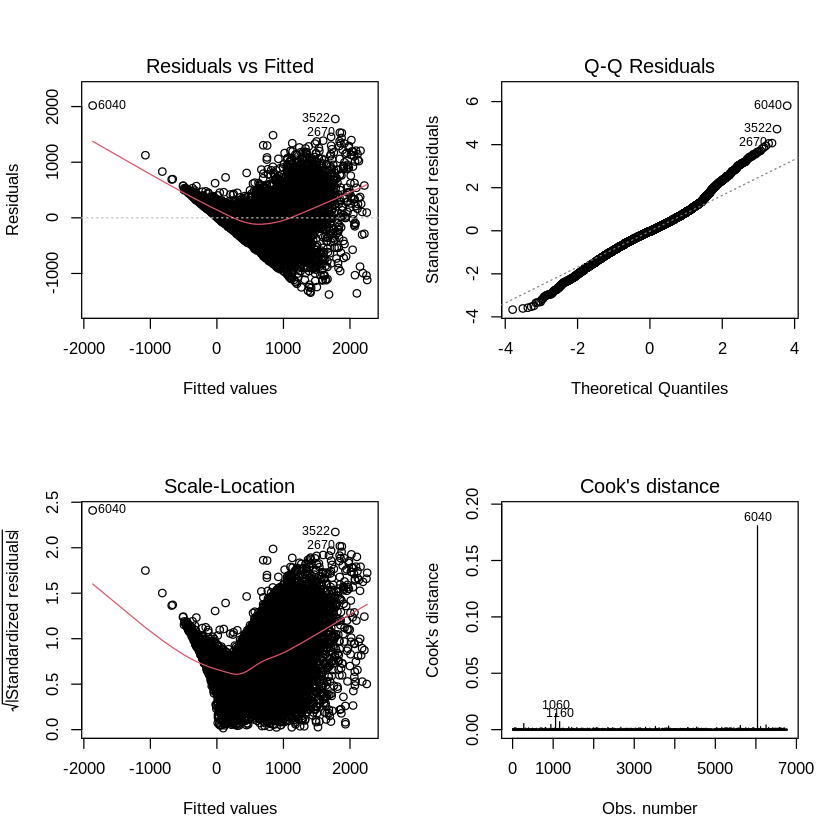

In [ ]:
par(mfrow=c(2,2))
plot(original_final , which=1:4)

Cook’s distance shows that there is an outlier. This will be removed from the model.

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(original_final)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1508.533, Df = 1, p = < 2.22e-16

P-value is less than 0.05, implying that the constant error variance assumption is violated. Therefore, box-cox transformation will be performed on the model.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(original_final)

 lag Autocorrelation D-W Statistic p-value
   1    -0.004870399      2.009702   0.646
 Alternative hypothesis: rho != 0

P-value is more than 0.05 and therefore, uncorrelated error assumption is not violated.

## BoxCox transformation

In [ ]:
# removing One outlier
model1_BC <- model1[-c(6040), ] # removing Outlier


for (i in colnames(model1_BC)){
  if(class(model1_BC[[i]]) == "integer" | class(model1_BC[[i]]) == "numeric"){
    model1_BC[i] <- model1_BC[i] + (abs(min(bike[i])))+1 #adding minimum value to make dataset positive
  }
}

bc1 <-boxTidwell(bike_count ~ ( temp + humidity), data = model1_BC)

lambda_val=bc1$result[1]

transform_boxcox <- function(data)
{
  # box-cox transformation
  data = (data^lambda_val)-1/lambda_val
  return(data)
}

for (i in colnames(model1_BC)){
  if(class(model1_BC[[i]]) == "integer" | class(model1_BC[[i]]) == "numeric"){
    model1_BC[i] <- transform_boxcox(model1_BC[i])
  }
}

### Final model 1

In [ ]:
# fitting new model
model1_BC_fit = lm(bike_count ~ hour + temp + humidity + solar_radiation +
    rainfall + snowfall + seasons + holiday, data=model1_BC
    )

summary(model1_BC_fit)


Call:
lm(formula = bike_count ~ hour + temp + humidity + solar_radiation + 
    rainfall + snowfall + seasons + holiday, data = model1_BC)

Residuals:
     Min       1Q   Median       3Q      Max 
-109.882  -15.014    0.253   15.629  120.232 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        43.7483     3.5814  12.215  < 2e-16 ***
hour1              -8.6268     2.2049  -3.912 9.23e-05 ***
hour2             -19.8489     2.1796  -9.107  < 2e-16 ***
hour3             -28.6157     2.2053 -12.976  < 2e-16 ***
hour4             -37.0104     2.2081 -16.761  < 2e-16 ***
hour5             -36.2146     2.1851 -16.573  < 2e-16 ***
hour6             -18.4712     2.1806  -8.471  < 2e-16 ***
hour7               7.6510     2.1856   3.501 0.000467 ***
hour8              32.2375     2.2088  14.595  < 2e-16 ***
hour9               1.5362     2.2798   0.674 0.500430    
hour10            -18.1290     2.3629  -7.673 1.92e-14 ***
hour11            -18.2114     2.

The final model can explain 71.55% of the data and it is statistically significant as the p-value of the model is less than 0.05. Non of the variables’s p-values are greater than 0.05 and therefore, statistically significant. However, after transformation, factors such as snowfall, hour 9 and hour 16 are showing that they’re not statistically significant.

In [ ]:
# Checking multicollinearity in the final Model
car::vif(model1_BC_fit)

,GVIF,Df,GVIF^(1/(2*Df))
hour,4.440614,23,1.032939
temp,5.233746,1,2.287738
humidity,2.011847,1,1.418396
solar_radiation,4.804818,1,2.191989
rainfall,1.123093,1,1.059761
snowfall,1.123577,1,1.059989
seasons,4.780295,3,1.297904
holiday,1.025185,1,1.012514


Since all the GVIF values are less than 10, it can be assumed that there is no multicollinearity for the final Model.

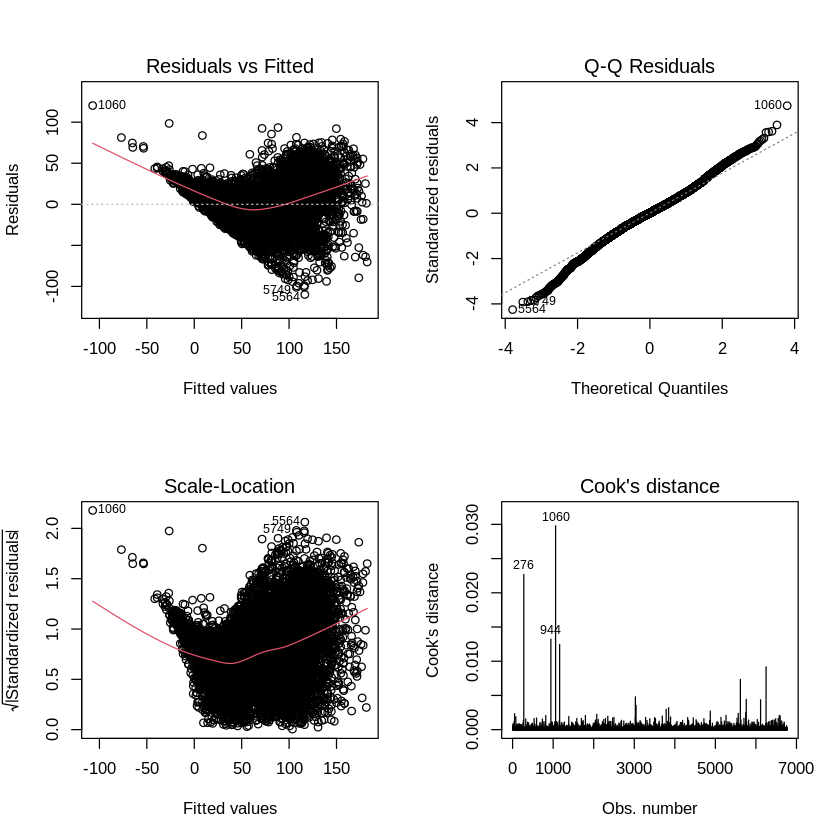

In [ ]:
par(mfrow=c(2,2))
plot(model1_BC_fit , which=1:4)

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(model1_BC_fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 610.9344, Df = 1, p = < 2.22e-16

P-value is less than 0.05, implying that the constant error variance assumption is still violated after box-cox transformation.


In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(model1_BC_fit)

 lag Autocorrelation D-W Statistic p-value
   1    -0.005014278      2.010001   0.718
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.


P-value is less than 0.05 therefore, it can be assumed that the residuals are not normally distributed for this model.

Model 1 did not turn out to pass homoscedasticity test and therefore, deemed to not be able to predict the bike demand accurately. We will now test if Model 2 can predict it better.

# 2. Model 2
Model 2 is a multiple linear regression model predicting bike rental demand using average daily weather conditions. For this model, bike demand for each day and average daily weather conditions are calculated. Data will be splitted to 80-20 train and test dataset to build the model.

## Data Splitting

In [ ]:
# creating dataframe for bike count by date
bike_by_day <- bike
levels(bike_by_day$holiday) <- c("No Holiday" = 1, "Holiday"= 2)
levels(bike_by_day$seasons) <- c("Winter" = 1, "Spring"= 2, "Summer" = 3, "Autumn" = 4)


bike_by_day <- bike_by_day %>% group_by(date) %>% summarise(sum_bike_count = sum(bike_count), mean_temp = mean(temp), mean_humidity = mean(humidity), mean_wind_speed = mean(wind_speed), mean_visibility = mean(visibility), mean_dew_point_temp = mean(dew_point_temp), mean_solar_radiation = mean(solar_radiation), mean_rainfall = mean(rainfall), mean_snowfall = mean(snowfall), seasons = mean(as.numeric(seasons)), holiday = mean(as.numeric(holiday)))

In [ ]:
#Changing the factors back to original values
bike_by_day$holiday <- as.factor(bike_by_day$holiday)
bike_by_day$seasons <- as.factor(bike_by_day$seasons)
levels(bike_by_day$holiday) <- c('1'= 'No Holiday', '2'='Holiday')
levels(bike_by_day$seasons) <- c('1'= 'Winter' , '2'='Spring', '3'= 'Summer', '4'='Autumn')
head(bike_by_day)

date,sum_bike_count,mean_temp,mean_humidity,mean_wind_speed,mean_visibility,mean_dew_point_temp,mean_solar_radiation,mean_rainfall,mean_snowfall,seasons,holiday
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
01/01/2018,4290,-1.283333,39.33333,1.454167,1894.8333,-13.866667,0.2558333,0.0000000,0.0000000,Autumn,No Holiday
01/02/2018,5377,-3.866667,44.00000,1.608333,1923.6250,-15.012500,0.3370833,0.0000000,0.9041667,Autumn,Holiday
01/03/2018,5132,0.450000,64.20833,3.554167,1084.0000,-6.387500,0.7475000,0.1041667,0.0000000,Spring,No Holiday
01/04/2018,17388,15.183333,68.91667,1.570833,831.8333,9.370833,0.3020833,0.0000000,0.0000000,Spring,Holiday
01/05/2018,26820,20.341667,72.79167,1.437500,456.4583,15.120833,0.5175000,0.0000000,0.0000000,Spring,No Holiday
01/06/2018,31928,23.708333,50.12500,1.954167,1598.1667,11.862500,1.1641667,0.0000000,0.0000000,Summer,Holiday


Data is splitted to 80% train set and 20% test set. This is to minimise overfitting. Data is splitted by random selection using sample() method.

In [ ]:
#Randomise our dataset

## 75% of the sample size
smp_size <- floor(0.80 * nrow(bike_by_day))

## set the seed to make your partition reproducible
set.seed(123)
trainIndex <- sample(seq_len(nrow(bike_by_day)), size = smp_size)

model2_prediction <- bike_by_day[ -trainIndex,]
model2 <- bike_by_day[ trainIndex,]

## Implementing model and evaluation

After splitting the data, train dataset is fitted to the model.

In [ ]:
# regression model by day
bike_by_day_model = lm(sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + mean_visibility + mean_dew_point_temp + mean_solar_radiation + mean_rainfall + mean_snowfall + seasons + holiday, data=model2)

#summary
summary(bike_by_day_model)


Call:
lm(formula = sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_visibility + mean_dew_point_temp + mean_solar_radiation + 
    mean_rainfall + mean_snowfall + seasons + holiday, data = model2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10732.9  -2611.3    380.5   2530.7  11448.5 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.297e+04  9.992e+03   3.299  0.00110 ** 
mean_temp            -5.287e+02  3.790e+02  -1.395  0.16417    
mean_humidity        -2.535e+02  1.130e+02  -2.244  0.02568 *  
mean_wind_speed      -1.273e+03  4.415e+02  -2.884  0.00424 ** 
mean_visibility      -6.274e-02  6.641e-01  -0.094  0.92480    
mean_dew_point_temp   9.295e+02  4.042e+02   2.300  0.02222 *  
mean_solar_radiation  1.220e+04  1.364e+03   8.944  < 2e-16 ***
mean_rainfall        -3.570e+03  6.402e+02  -5.577 5.96e-08 ***
mean_snowfall        -5.857e+02  6.705e+02  -0.874  0.38313    
seasonsSpring      

This model can explain 0.8434 and is statistically significant as p-value is < 0.05. However, it shows that there are some factors that are not statistically significant. Stepwise AIC is used to calculate an optimum model for prediction.

In [ ]:
# possible subsets regression
stepReg=MASS::stepAIC(bike_by_day_model, direction="both")

Start:  AIC=4682.07
sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_visibility + mean_dew_point_temp + mean_solar_radiation + 
    mean_rainfall + mean_snowfall + seasons + holiday

                       Df  Sum of Sq        RSS    AIC
- mean_visibility       1     138612 4176899119 4680.1
- mean_snowfall         1   11848940 4188609447 4680.9
<none>                               4176760507 4682.1
- mean_temp             1   30215864 4206976371 4682.1
- mean_humidity         1   78153669 4254914175 4685.3
- mean_dew_point_temp   1   82133290 4258893797 4685.6
- holiday               1   97276886 4274037393 4686.6
- mean_wind_speed       1  129189506 4305950013 4688.7
- mean_rainfall         1  482894786 4659655293 4710.9
- mean_solar_radiation  1 1242133949 5418894456 4753.5
- seasons               3 1372262290 5549022797 4756.2

Step:  AIC=4680.08
sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_dew_point_temp + mean_solar_radiation + 

In [ ]:
stepReg$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,269,4176760507,4682.072
- mean_visibility,1,138612,270,4176899119,4680.082
- mean_snowfall,1,12005670,271,4188904789,4678.891


In [ ]:
# multicollinearity
car::vif(bike_by_day_model)

,GVIF,Df,GVIF^(1/(2*Df))
mean_temp,332.934319,1,18.246488
mean_humidity,49.016289,1,7.001163
mean_wind_speed,1.263369,1,1.123997
mean_visibility,2.050572,1,1.431982
mean_dew_point_temp,463.892705,1,21.538169
mean_solar_radiation,3.264403,1,1.806766
mean_rainfall,1.704366,1,1.305514
mean_snowfall,1.170149,1,1.081734
seasons,7.575015,3,1.401406
holiday,1.042355,1,1.020958


mean_temperature and mean_dew_point_temp GVIF values are greater than 10 and therefore, there is multicollinearity. The stepwise AIC removed visibility and snowfall in the final model. These variables will be removed from the final model.

In [ ]:
# Removing columns with multicollinearity and stepwise
bike_by_day_model_final = lm(sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + mean_solar_radiation + mean_rainfall + seasons + holiday, data=model2)

#summary
summary(bike_by_day_model_final)


Call:
lm(formula = sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_solar_radiation + mean_rainfall + seasons + holiday, 
    data = model2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10443.0  -2558.4    196.8   2565.9  11704.5 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          11836.98    2198.00   5.385 1.57e-07 ***
mean_temp              346.09      53.14   6.512 3.56e-10 ***
mean_humidity          -14.96      24.24  -0.617  0.53759    
mean_wind_speed      -1241.65     433.81  -2.862  0.00453 ** 
mean_solar_radiation 11933.36    1369.45   8.714 2.93e-16 ***
mean_rainfall        -3944.21     605.06  -6.519 3.43e-10 ***
seasonsSpring        -4977.03     705.83  -7.051 1.46e-11 ***
seasonsSummer        -2571.73     921.82  -2.790  0.00565 ** 
seasonsAutumn        -8036.42    1011.77  -7.943 5.24e-14 ***
holidayHoliday        2506.71    1106.13   2.266  0.02422 *  
---
Signif. codes:  0 ‘***’ 0.001

In [ ]:
# multicollinearity
car::vif(bike_by_day_model_final)

,GVIF,Df,GVIF^(1/(2*Df))
mean_temp,6.454181,1,2.540508
mean_humidity,2.223462,1,1.491128
mean_wind_speed,1.202904,1,1.096770
mean_solar_radiation,3.244988,1,1.801385
mean_rainfall,1.500984,1,1.225147
seasons,6.040279,3,1.349510
holiday,1.033729,1,1.016725


The final model can explain 84.18% of the data and is statistically significant at 95% confidence interval as p-value < 0.05. There is no multicollinearity in the final model. The p-value of mean_humidity is greater than 0.5 and therefore, is not statistically significant.

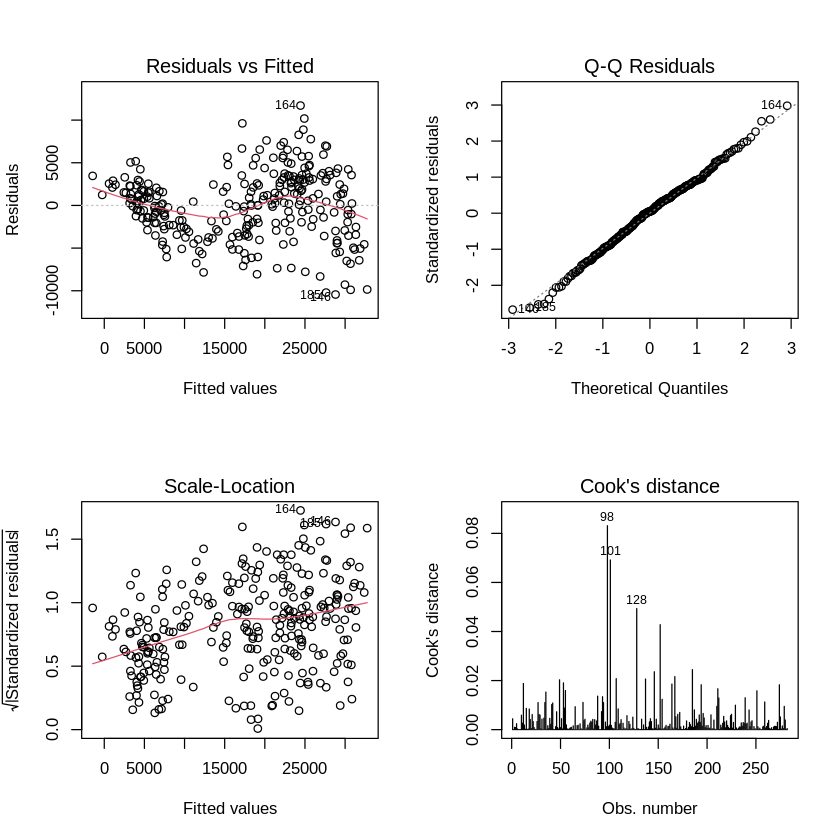

In [ ]:
par(mfrow=c(2,2))
plot(bike_by_day_model_final , which=1:4)

There are no outliers in the dataset but the resituals shows a bit of hetroscedasticity.

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(bike_by_day_model_final)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 27.39761, Df = 1, p = 1.6564e-07

P-value is less than 0.05, implying that the constant error variance assumption is violated.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(bike_by_day_model_final)

 lag Autocorrelation D-W Statistic p-value
   1      0.01148254      1.970562   0.798
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.

In [ ]:
# Test for Normally Distributed Errors
shapiro.test(bike_by_day_model_final$residuals)


	Shapiro-Wilk normality test

data:  bike_by_day_model_final$residuals
W = 0.99635, p-value = 0.7624


P-value of the Shapiro-Wilk is greater than 0.05 therefore, it can be concluded that normality error assumption is not violated. Data will be transformed using box-cox transformation as it did not pass all the tests.

## BoxCox transformation

In [ ]:
# Making all the values positive
bike_by_day_BC <- bike_by_day

for (i in colnames(bike_by_day_BC)){
  if(class(bike_by_day_BC[[i]]) == "integer" | class(bike_by_day_BC[[i]]) == "numeric"){
    bike_by_day_BC[i] <- round(bike_by_day_BC[i] + (abs(min(bike_by_day[i])))+1 , digits=3) #adding minimum value to make dataset positive
  }
}

In [ ]:
bc1 <-boxTidwell(sum_bike_count ~ mean_temp +
    mean_humidity +
    mean_solar_radiation
  ,data = bike_by_day_BC)

lambda_val=bc1$result[1]

In [ ]:
transform_boxcox <- function(data)
{
  # box-cox transformation
  data = (data^lambda_val)-1/lambda_val
  return(data)
}

for (i in colnames(bike_by_day_BC)){
  if(class(bike_by_day_BC[[i]]) == "integer" | class(bike_by_day_BC[[i]]) == "numeric"){
    bike_by_day_BC[i] <- transform_boxcox(bike_by_day_BC[i])
  }
}

### Final Model 2

In [ ]:
# fitting new model
bike_by_day_BC_fit = lm(sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed +
    mean_solar_radiation + mean_rainfall + seasons + holiday,
    data = bike_by_day_BC)

summary(bike_by_day_BC_fit)


Call:
lm(formula = sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_solar_radiation + mean_rainfall + seasons + holiday, 
    data = bike_by_day_BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.327 -14.109   1.105  14.262  54.484 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          146.8521    18.6489   7.875 4.54e-14 ***
mean_temp             16.3624     1.9990   8.185 5.40e-15 ***
mean_humidity         -0.7035     1.7475  -0.403 0.687509    
mean_wind_speed      -19.0102     7.2986  -2.605 0.009597 ** 
mean_solar_radiation 138.3124    15.0684   9.179  < 2e-16 ***
mean_rainfall        -67.4135     7.5263  -8.957  < 2e-16 ***
seasonsSpring        -26.8185     3.3870  -7.918 3.39e-14 ***
seasonsSummer        -18.7022     4.0442  -4.624 5.33e-06 ***
seasonsAutumn        -48.7645     4.8990  -9.954  < 2e-16 ***
holidayHoliday        20.1852     5.2617   3.836 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘

The final model can explain 0.86% of the data and it is statistically significant as the p-value of the model is less than 0.05. Non of the variables’s p-values are greater than 0.05 and therefore, statistically significant.

In [ ]:
# Checking multicollinearity in the final Model
car::vif(bike_by_day_BC_fit)

,GVIF,Df,GVIF^(1/(2*Df))
mean_temp,6.314802,1,2.512927
mean_humidity,2.395436,1,1.547720
mean_wind_speed,1.274946,1,1.129135
mean_solar_radiation,3.309445,1,1.819188
mean_rainfall,1.609908,1,1.268821
seasons,5.734872,3,1.337891
holiday,1.034576,1,1.017141


Since all the GVIF values are less than 10, it can be assumed that there is no multicollinearity for the final Model.

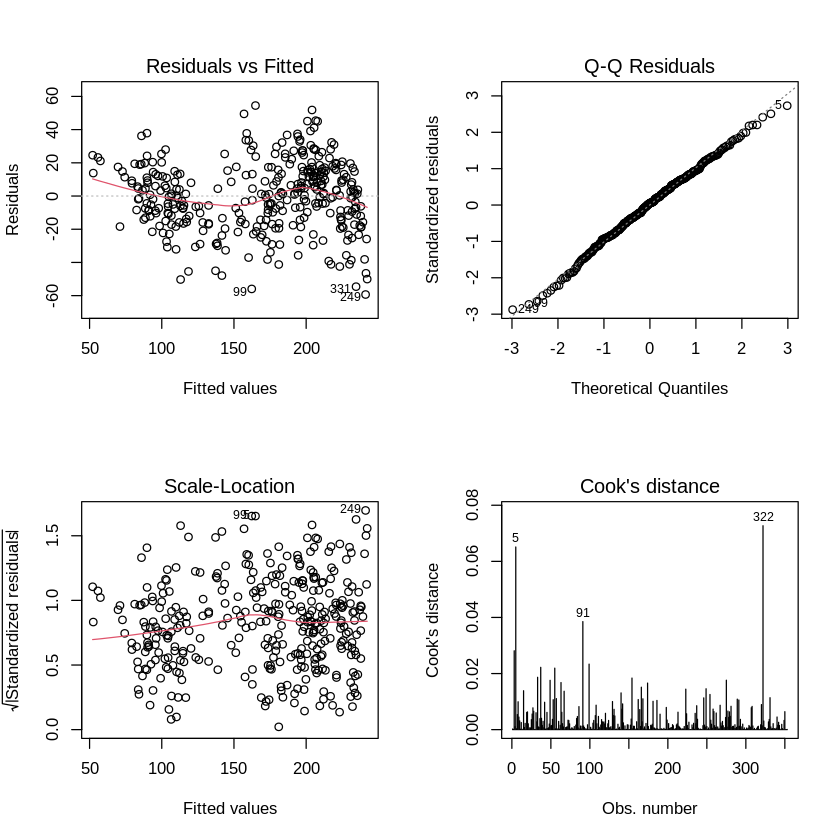

In [ ]:
par(mfrow=c(2,2))
plot(bike_by_day_BC_fit , which=1:4)

There are not outliers detected.

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test

ncvTest(bike_by_day_BC_fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 5.579005, Df = 1, p = 0.018177

P-value is still less than 0.05, implying that the constant error variance assumption is violated even after transformation.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(bike_by_day_BC_fit)

 lag Autocorrelation D-W Statistic p-value
   1      0.03203118      1.935832     0.5
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.

In [ ]:
shapiro.test(bike_by_day_BC_fit$residuals)


	Shapiro-Wilk normality test

data:  bike_by_day_BC_fit$residuals
W = 0.99623, p-value = 0.5711


P-value is less than 0.05 therefore, it can be assumed that the residuals are not normally distributed for this model.

# 3. Model 3
Model 3 is a multiple linear regression model predicting bike rental demand during am hours and pm hours. For this, sum of bike counts for am hours and pm hours are calculated and average values of the am and pm weather data.

## Data Splitting

In [ ]:
# Dividing to am and pm
bike_AMPM <- bike
bike_AMPM$hour <- as.numeric(bike_AMPM$hour)

bike_AMPM['hour'] [bike_AMPM['hour'] <=12] <- -1
bike_AMPM['hour'] [bike_AMPM['hour'] >12] <- 1
bike_AMPM$hour <- factor(bike_AMPM$hour)


head(bike_AMPM)

,date,bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday
,<chr>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,01/12/2017,254,-1,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,204,-1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday
3,01/12/2017,173,-1,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday
4,01/12/2017,107,-1,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday
5,01/12/2017,78,-1,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday
6,01/12/2017,100,-1,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday


In [ ]:
# creating dataframe for bike count by am pm
levels(bike_AMPM$holiday) <- c("No Holiday" = 1, "Holiday"= 2)
levels(bike_AMPM$seasons) <- c("Winter" = 1, "Spring"= 2, "Summer" = 3, "Autumn" = 4)

bike_AMPM <- bike_AMPM %>% group_by(date,hour) %>% summarise(bike_count = sum(bike_count), temp = mean(temp), humidity = mean(humidity), wind_speed = mean(wind_speed), visibility = mean(visibility), dew_point_temp = mean(dew_point_temp), solar_radiation = mean(solar_radiation), rainfall = mean(rainfall), snowfall = mean(snowfall), seasons = mean(as.numeric(seasons)), holiday = mean(as.numeric(holiday)))

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


In [ ]:
bike_AMPM

date,hour,bike_count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday
<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01/01/2018,-1,1520,-3.5666667,44.50000,0.9916667,1895.9167,-14.1750000,0.12666667,0.0000000,0.0000000,4,1
01/01/2018,1,2770,1.0000000,34.16667,1.9166667,1893.7500,-13.5583333,0.38500000,0.0000000,0.0000000,4,1
01/02/2018,-1,1962,-6.5083333,53.91667,1.3083333,1891.0833,-14.4583333,0.15250000,0.0000000,1.5750000,4,2
01/02/2018,1,3415,-1.2250000,34.08333,1.9083333,1956.1667,-15.5666667,0.52166667,0.0000000,0.2333333,4,2
01/03/2018,-1,1361,1.6333333,85.75000,2.8166667,778.4167,-0.7666667,0.28750000,0.2083333,0.0000000,2,1
01/03/2018,1,3771,-0.7333333,42.66667,4.2916667,1389.5833,-12.0083333,1.20750000,0.0000000,0.0000000,2,1
01/04/2018,-1,4227,12.8750000,65.83333,0.9666667,973.5000,6.5250000,0.18583333,0.0000000,0.0000000,2,2
01/04/2018,1,13161,17.4916667,72.00000,2.1750000,690.1667,12.2166667,0.41833333,0.0000000,0.0000000,2,2
01/05/2018,-1,7847,19.0916667,77.91667,0.8416667,374.1667,14.9750000,0.40416667,0.0000000,0.0000000,2,1


In [ ]:
#Changing the factors back to original values
bike_AMPM$holiday <- as.factor(bike_AMPM$holiday)
bike_AMPM$seasons <- as.factor(bike_AMPM$seasons)
levels(bike_AMPM$holiday) <- c('1'= 'No Holiday', '2'='Holiday')
levels(bike_AMPM$seasons) <- c('1'= 'Winter' , '2'='Spring', '3'= 'Summer', '4'='Autumn')

#Drop date column
bike_AMPM <- subset(bike_AMPM, select = -c(date))

head(bike_AMPM)

hour,bike_count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
-1,1520,-3.5666667,44.50000,0.9916667,1895.9167,-14.1750000,0.1266667,0.0000000,0.0000000,Autumn,No Holiday
1,2770,1.0000000,34.16667,1.9166667,1893.7500,-13.5583333,0.3850000,0.0000000,0.0000000,Autumn,No Holiday
-1,1962,-6.5083333,53.91667,1.3083333,1891.0833,-14.4583333,0.1525000,0.0000000,1.5750000,Autumn,Holiday
1,3415,-1.2250000,34.08333,1.9083333,1956.1667,-15.5666667,0.5216667,0.0000000,0.2333333,Autumn,Holiday
-1,1361,1.6333333,85.75000,2.8166667,778.4167,-0.7666667,0.2875000,0.2083333,0.0000000,Spring,No Holiday
1,3771,-0.7333333,42.66667,4.2916667,1389.5833,-12.0083333,1.2075000,0.0000000,0.0000000,Spring,No Holiday


Below is the histograms of how the continuous variables look like after transforming the data. The sum_bike_count shows signs of having a trimodal distribution and temperature shows bimodal distribution compared to the original data. The rest of columns seem to be not too different from the original data distribution.

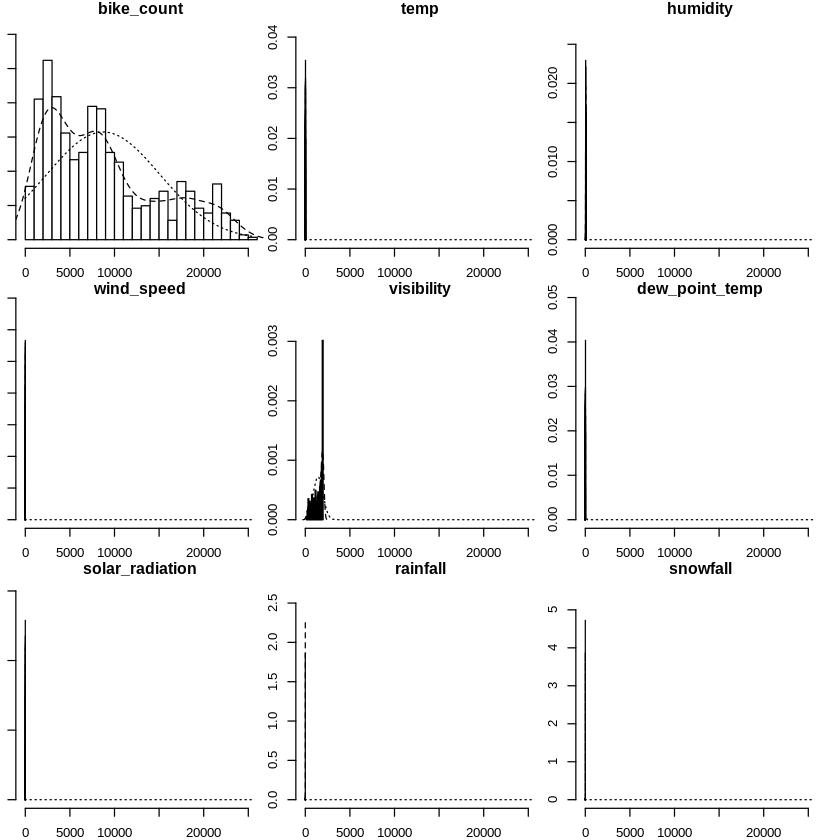

In [ ]:
#Creating histograms
multi.hist(bike_AMPM[,sapply(bike_AMPM, is.numeric)])

Data is splitted to 80% train set and 20% test set. This is to minimise overfitting. Data is splitted by random selection using sample() method.

In [ ]:
#Randomise our dataset

## 80% of the sample size
smp_size <- floor(0.80 * nrow(bike_AMPM))

## set the seed to make your partition reproducible
set.seed(123)
trainIndex <- sample(seq_len(nrow(bike_AMPM)), size = smp_size)

model3_prediction <- bike_AMPM[ -trainIndex,]
model3 <- bike_AMPM[ trainIndex,]

### Implementing model and evaluation

In [ ]:
# regression model with all columns except functioning day
am_pm_model = lm(bike_count ~ hour+temp+humidity+wind_speed+visibility+dew_point_temp+solar_radiation+rainfall+snowfall+seasons+holiday, data=model3)

#summary
summary(am_pm_model)


Call:
lm(formula = bike_count ~ hour + temp + humidity + wind_speed + 
    visibility + dew_point_temp + solar_radiation + rainfall + 
    snowfall + seasons + holiday, data = model3)

Residuals:
    Min      1Q  Median      3Q     Max 
-7580.5 -1774.8  -110.7  1658.1  9173.9 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10803.0578  3438.4154   3.142  0.00177 ** 
hour1            2603.6307   334.3744   7.787 3.44e-14 ***
temp              -70.8103   132.5580  -0.534  0.59343    
humidity          -88.9478    38.1577  -2.331  0.02011 *  
wind_speed       -366.3750   183.0305  -2.002  0.04581 *  
visibility         -0.1240     0.2969  -0.418  0.67626    
dew_point_temp    281.2093   139.9159   2.010  0.04494 *  
solar_radiation  6282.3114   566.6650  11.086  < 2e-16 ***
rainfall        -1575.4707   233.7714  -6.739 4.03e-11 ***
snowfall           -3.7379   319.7514  -0.012  0.99068    
seasonsSpring   -2792.0417   375.2958  -7.440 3.91e-13 **

In [ ]:
#Building ANOVA table with full dataset (all columns) against intercept only model
anova(am_pm_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
hour,1,5.152075e+09,5.152075e+09,6.581438e+02,4.785419e-96
temp,1,8.164063e+09,8.164063e+09,1.042906e+03,4.174481e-129
humidity,1,1.620662e+09,1.620662e+09,2.070289e+02,4.516973e-40
wind_speed,1,2.706774e+06,2.706774e+06,3.457726e-01,5.567573e-01
visibility,1,4.452068e+06,4.452068e+06,5.687225e-01,4.510898e-01
dew_point_temp,1,2.540416e+07,2.540416e+07,3.245214e+00,7.217986e-02
solar_radiation,1,1.445029e+09,1.445029e+09,1.845930e+02,1.845187e-36
rainfall,1,4.745525e+08,4.745525e+08,6.062097e+01,3.457694e-14
snowfall,1,2.081588e+04,2.081588e+04,2.659092e-03,9.588929e-01


In [ ]:
# possible subsets regression
library(MASS)
stepReg=MASS::stepAIC(am_pm_model, direction="both")

Start:  AIC=8966.33
bike_count ~ hour + temp + humidity + wind_speed + visibility + 
    dew_point_temp + solar_radiation + rainfall + snowfall + 
    seasons + holiday

                  Df Sum of Sq        RSS    AIC
- snowfall         1      1070 4305505533 8964.3
- visibility       1   1366394 4306870856 8964.5
- temp             1   2233786 4307738249 8964.6
<none>                         4305504463 8966.3
- wind_speed       1  31366505 4336870968 8968.4
- dew_point_temp   1  31621783 4337126246 8968.5
- humidity         1  42537159 4348041622 8969.9
- holiday          1  50321496 4355825959 8970.9
- rainfall         1 355548738 4661053200 9009.1
- hour             1 474628752 4780133215 9023.3
- seasons          3 845815569 5151320032 9061.5
- solar_radiation  1 962160506 5267664969 9078.1

Step:  AIC=8964.33
bike_count ~ hour + temp + humidity + wind_speed + visibility + 
    dew_point_temp + solar_radiation + rainfall + seasons + holiday

                  Df Sum of Sq        R

In [ ]:
stepReg$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,550,4305504463,8966.332
- snowfall,1,1069.786,551,4305505533,8964.332
- visibility,1,1365404.194,552,4306870937,8962.511
- temp,1,1951237.637,553,4308822174,8960.766


In [ ]:
# multicollinearity
car::vif(am_pm_model)

,GVIF,Df,GVIF^(1/(2*Df))
hour,2.013430,1,1.418954
temp,183.172662,1,13.534130
humidity,34.606618,1,5.882739
wind_speed,1.581910,1,1.257740
visibility,1.849322,1,1.359898
dew_point_temp,247.930596,1,15.745812
solar_radiation,4.019861,1,2.004959
rainfall,1.430928,1,1.196214
snowfall,1.148384,1,1.071627
seasons,6.907353,3,1.380020


Stepwise method produced a final regression model without temperature, snowfall and visibility. dew_point_temp and temp GVIF values are greater than 10 and therefore, there is multicollinearity. Therefore, temperature visibility and snowfall will be removed from the final model.

In [ ]:
# Removing columns with multicollinearity and stepwise
am_pm_model_final = lm(bike_count ~ hour + humidity + wind_speed + dew_point_temp +
    solar_radiation + rainfall + seasons + holiday, data=model3)

#summary
summary(am_pm_model_final)


Call:
lm(formula = bike_count ~ hour + humidity + wind_speed + dew_point_temp + 
    solar_radiation + rainfall + seasons + holiday, data = model3)

Residuals:
    Min      1Q  Median      3Q     Max 
-7597.7 -1775.7   -83.3  1634.7  9298.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8820.03    1054.90   8.361 5.07e-16 ***
hour1            2607.90     327.78   7.956 1.01e-14 ***
humidity          -68.07      13.19  -5.162 3.41e-07 ***
wind_speed       -375.22     180.16  -2.083   0.0377 *  
dew_point_temp    207.75      25.37   8.188 1.84e-15 ***
solar_radiation  6226.55     552.96  11.260  < 2e-16 ***
rainfall        -1609.85     225.42  -7.142 2.92e-12 ***
seasonsSpring   -2752.29     354.07  -7.773 3.76e-14 ***
seasonsSummer   -2463.34     458.11  -5.377 1.12e-07 ***
seasonsAutumn   -3794.97     497.44  -7.629 1.04e-13 ***
holidayHoliday   1419.42     559.95   2.535   0.0115 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

The final model can explain 80.49% of the data and it is statistically significant as the p-value of the model is less than 0.05. Non of the variables’s p-values are greater than 0.05 and therefore, statistically significant.

In [ ]:
# Checking multicollinearity in the final Model
car::vif(am_pm_model_final)

,GVIF,Df,GVIF^(1/(2*Df))
hour,1.943833,1,1.394214
humidity,4.151456,1,2.037512
wind_speed,1.539901,1,1.240928
dew_point_temp,8.190588,1,2.861920
solar_radiation,3.845713,1,1.961049
rainfall,1.336744,1,1.156176
seasons,5.829589,3,1.341548
holiday,1.034496,1,1.017102


Since all the GVIF values are less than 10, it can be assumed that there is no multicollinearity for the final Model.

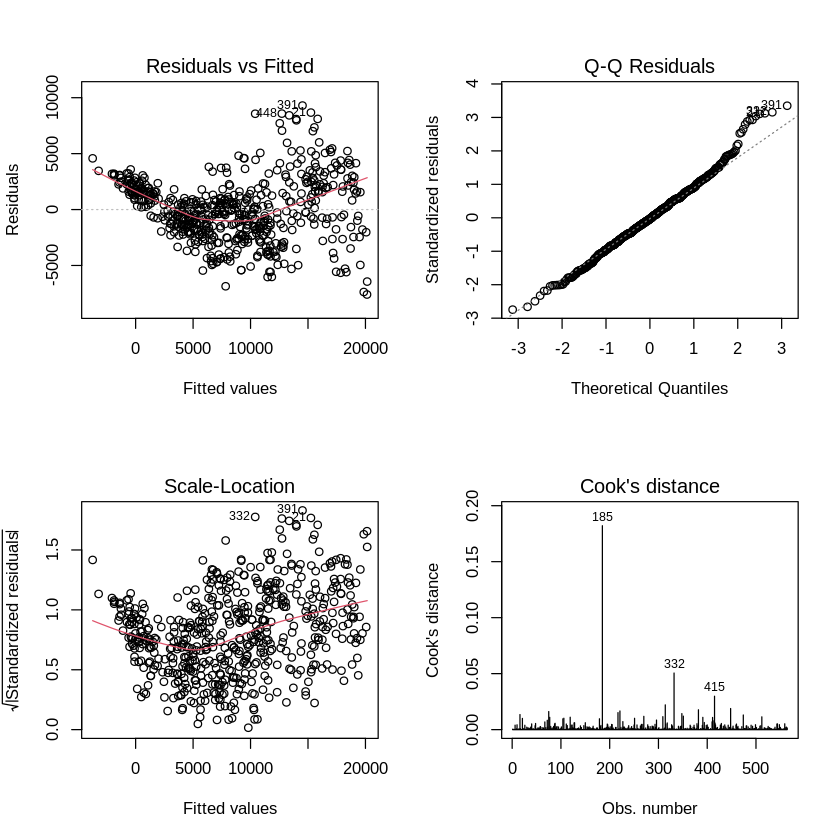

In [ ]:
par(mfrow=c(2,2))
plot(am_pm_model_final , which=1:4)

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test
library(car)

ncvTest(am_pm_model_final)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 72.38561, Df = 1, p = < 2.22e-16

P-value is less than 0.05, implying that the constant error variance assumption is violated.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(am_pm_model_final)

 lag Autocorrelation D-W Statistic p-value
   1     -0.04232994      2.082806   0.336
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.

In [ ]:
shapiro.test(am_pm_model_final$residuals)


	Shapiro-Wilk normality test

data:  am_pm_model_final$residuals
W = 0.99099, p-value = 0.001627


P-value is less than 0.05 therefore, it can be assumed that the residuals are not normally distributed for this model. Therefore, box-cox transformation is performed again on the model.

## BoxCox transformation

In [ ]:
bike_AMPM_BC <- model3[-c(185), ]

for (i in colnames(bike_AMPM_BC)){
  if(class(bike_AMPM_BC[[i]]) == "integer" | class(bike_AMPM_BC[[i]]) == "numeric"){
    bike_AMPM_BC[i] <- round(bike_AMPM_BC[i] + (abs(min(bike_AMPM[i])))+1 , digits=3) # adding minimum value to make dataset positive
  }
}

bc1 <-boxTidwell(
  bike_AMPM_BC$bike_count ~
    bike_AMPM_BC$humidity +
    bike_AMPM_BC$dew_point_temp +
    bike_AMPM_BC$solar_radiation +
    bike_AMPM_BC$rainfall
  )

lambda_val=bc1$result[1]

transform_boxcox <- function(data)
{
  # box-cox transformation
  data = data^lambda_val
  return(data)
}

for (i in colnames(bike_AMPM_BC)){
  if(class(bike_AMPM_BC[[i]]) == "integer" | class(bike_AMPM_BC[[i]]) == "numeric"){
    bike_AMPM_BC[i] <- transform_boxcox(bike_AMPM_BC[i])
  }
}

## Final model 3

In [ ]:
# fitting new model
bike_AMPM_BC_fit = lm(bike_AMPM_BC$bike_count ~ bike_AMPM_BC$hour +
    bike_AMPM_BC$humidity +
    bike_AMPM_BC$wind_speed +
    bike_AMPM_BC$dew_point_temp +
    bike_AMPM_BC$solar_radiation +
    bike_AMPM_BC$rainfall +
    bike_AMPM_BC$seasons +
    bike_AMPM_BC$holiday)

summary(bike_AMPM_BC_fit)


Call:
lm(formula = bike_AMPM_BC$bike_count ~ bike_AMPM_BC$hour + bike_AMPM_BC$humidity + 
    bike_AMPM_BC$wind_speed + bike_AMPM_BC$dew_point_temp + bike_AMPM_BC$solar_radiation + 
    bike_AMPM_BC$rainfall + bike_AMPM_BC$seasons + bike_AMPM_BC$holiday)

Residuals:
     Min       1Q   Median       3Q      Max 
-9792235 -2027161  -338411  1946395 13763451 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -1745366.2  1162925.5  -1.501 0.133968    
bike_AMPM_BC$hour1            2762317.3   395705.4   6.981 8.46e-12 ***
bike_AMPM_BC$humidity           -1043.3      454.5  -2.295 0.022081 *  
bike_AMPM_BC$wind_speed       -157089.9    58256.4  -2.697 0.007221 ** 
bike_AMPM_BC$dew_point_temp      7682.0     1615.3   4.756 2.53e-06 ***
bike_AMPM_BC$solar_radiation  3304932.3   259055.2  12.758  < 2e-16 ***
bike_AMPM_BC$rainfall         -368012.5   105942.4  -3.474 0.000554 ***
bike_AMPM_BC$seasonsSpring   -2827892.9   442413.

After transforming the data, the model can explain 71.79% of the data and it is statistically significant as the p-value of the model is less than 0.05. Non of the variables’s p-values are greater than 0.05 and therefore, it is statistically significant.

In [ ]:
# Checking multicollinearity in the final Model
car::vif(bike_AMPM_BC_fit)

,GVIF,Df,GVIF^(1/(2*Df))
bike_AMPM_BC$hour,1.837673,1,1.355608
bike_AMPM_BC$humidity,3.497046,1,1.870039
bike_AMPM_BC$wind_speed,1.432754,1,1.196977
bike_AMPM_BC$dew_point_temp,7.285276,1,2.699125
bike_AMPM_BC$solar_radiation,3.337395,1,1.826854
bike_AMPM_BC$rainfall,1.299222,1,1.139834
bike_AMPM_BC$seasons,6.190642,3,1.355052
bike_AMPM_BC$holiday,1.029240,1,1.014515


Since all the GVIF values are less than 10, it can be assumed that there is no multicollinearity for the transformed model.

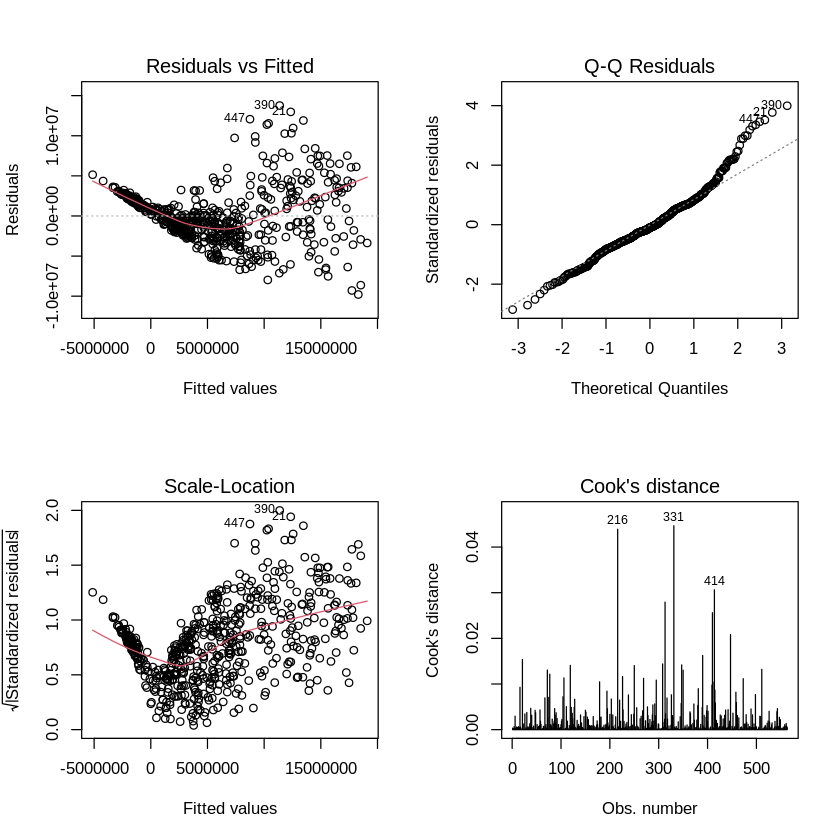

In [ ]:
par(mfrow=c(2,2))
plot(bike_AMPM_BC_fit , which=1:4)

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test

ncvTest(bike_AMPM_BC_fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 161.529, Df = 1, p = < 2.22e-16

P-value is still less than 0.05, implying that the constant error variance assumption is violated even after transformation.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(bike_AMPM_BC_fit)

 lag Autocorrelation D-W Statistic p-value
   1    8.010898e-05      1.998835   0.926
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.

In [ ]:
shapiro.test(bike_AMPM_BC_fit$residuals)


	Shapiro-Wilk normality test

data:  bike_AMPM_BC_fit$residuals
W = 0.96879, p-value = 1.421e-09


P-value is less than 0.05 therefore, it can be assumed that the residuals are not normally distributed for this model. Therefore, this model cannot adequately predict the bike demand.

## 4. Model 4
Model 4 is a multiple linear regression model predicting bike rental demand for every day with weekend column and using daily average weather conditions. We expect bike demand will be higher during weekends as more people will be hiring them for recreational purposes and this will be one of the factors.

## Data Splitting

In [ ]:
#Creating weekend colum
bike_by_day$date <- as.Date(bike_by_day$date, "%d/%m/%y")
bike_by_day$weekend = chron::is.weekend(bike_by_day$date)
bike_by_day$weekend <- as.factor(bike_by_day$weekend)
bike_by_day

date,sum_bike_count,mean_temp,mean_humidity,mean_wind_speed,mean_visibility,mean_dew_point_temp,mean_solar_radiation,mean_rainfall,mean_snowfall,seasons,holiday,weekend
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
2020-01-01,4290,-1.283333,39.33333,1.4541667,1894.8333,-13.866667,0.25583333,0.00000000,0.00000000,Autumn,No Holiday,FALSE
2020-02-01,5377,-3.866667,44.00000,1.6083333,1923.6250,-15.012500,0.33708333,0.00000000,0.90416667,Autumn,Holiday,TRUE
2020-03-01,5132,0.450000,64.20833,3.5541667,1084.0000,-6.387500,0.74750000,0.10416667,0.00000000,Spring,No Holiday,TRUE
2020-04-01,17388,15.183333,68.91667,1.5708333,831.8333,9.370833,0.30208333,0.00000000,0.00000000,Spring,Holiday,FALSE
2020-05-01,26820,20.341667,72.79167,1.4375000,456.4583,15.120833,0.51750000,0.00000000,0.00000000,Spring,No Holiday,FALSE
2020-06-01,31928,23.708333,50.12500,1.9541667,1598.1667,11.862500,1.16416667,0.00000000,0.00000000,Summer,Holiday,FALSE
2020-07-01,3231,22.025000,93.45833,0.7833333,933.7917,20.833333,0.08708333,3.37500000,0.00000000,Summer,Holiday,FALSE
2020-08-01,20712,33.429167,55.79167,1.6833333,1853.4583,22.829167,1.07041667,0.00000000,0.00000000,Summer,Holiday,TRUE
2020-09-01,26010,25.454167,61.20833,1.2083333,1839.0833,16.725000,0.87541667,0.00000000,0.00000000,Winter,Holiday,FALSE


As expected, Fig 5. shows that bike demand is slightly higher during the weekends.

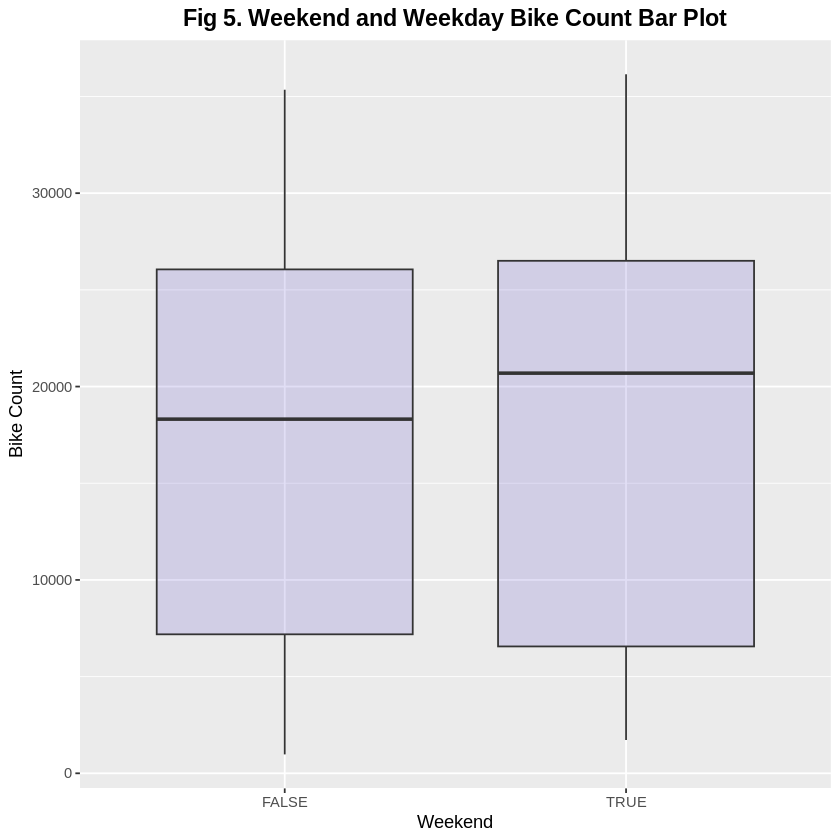

In [ ]:
# Bar plot for weekend and weekday bike demand
fig5 <- ggplot(bike_by_day, aes(x = as.factor(weekend), y = sum_bike_count)) + geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Fig 5. Weekend and Weekday Bike Count Bar Plot") +  xlab("Weekend") + ylab("Bike Count")
fig5 + theme(plot.title = element_text(size=14, face="bold", hjust=0.5))

## Data spliting

Data is splitted to 90% train set and 10% test set instead of usual 8-20 due to being smaller dataset. Data is splitted by random selection using sample() method.

In [ ]:
#Randomise our dataset

## 75% of the sample size
smp_size <- floor(0.90 * nrow(bike_by_day))

## set the seed to make your partition reproducible
set.seed(500)
trainIndex <- sample(seq_len(nrow(bike_by_day)), size = smp_size)

model4_prediction <- bike_by_day[ -trainIndex,]
model4 <- bike_by_day[ trainIndex,]

## Implementing model and evaluation

In [ ]:
# regression model by day with Weekend
bike_weekend_model = lm(sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + mean_visibility + mean_dew_point_temp + mean_solar_radiation + mean_rainfall + mean_snowfall + seasons + holiday+ weekend, data=model4)

#summary
summary(bike_weekend_model)


Call:
lm(formula = sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_visibility + mean_dew_point_temp + mean_solar_radiation + 
    mean_rainfall + mean_snowfall + seasons + holiday + weekend, 
    data = model4)

Residuals:
     Min       1Q   Median       3Q      Max 
-12217.1  -2425.6    119.3   2364.1  11546.1 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          29313.3932  9717.1960   3.017 0.002772 ** 
mean_temp             -441.9317   368.9779  -1.198 0.231963    
mean_humidity         -202.6930   108.6237  -1.866 0.063006 .  
mean_wind_speed      -1414.7777   466.2044  -3.035 0.002617 ** 
mean_visibility         -0.2196     0.6901  -0.318 0.750541    
mean_dew_point_temp    795.2753   390.2534   2.038 0.042434 *  
mean_solar_radiation 12763.3986  1369.6733   9.319  < 2e-16 ***
mean_rainfall        -3548.4095   632.1151  -5.614 4.48e-08 ***
mean_snowfall         -690.1610   666.3953  -1.036 0.301185    
seas

In [ ]:
# possible subsets regression (by day and weekend)
stepReg=MASS::stepAIC(bike_weekend_model, direction="both")

Start:  AIC=5297.59
sum_bike_count ~ mean_temp + mean_humidity + mean_wind_speed + 
    mean_visibility + mean_dew_point_temp + mean_solar_radiation + 
    mean_rainfall + mean_snowfall + seasons + holiday + weekend

                       Df  Sum of Sq        RSS    AIC
- mean_visibility       1    1755800 5255588899 5295.7
- mean_snowfall         1   18598184 5272431282 5296.7
- mean_temp             1   24873862 5278706961 5297.1
<none>                               5253833098 5297.6
- mean_humidity         1   60375619 5314208717 5299.2
- mean_dew_point_temp   1   72007074 5325840172 5299.9
- weekend               1  102421987 5356255086 5301.7
- holiday               1  105364470 5359197569 5301.9
- mean_wind_speed       1  159682489 5413515587 5305.1
- mean_rainfall         1  546397538 5800230637 5327.0
- mean_solar_radiation  1 1505678886 6759511984 5375.5
- seasons               3 1651376972 6905210070 5378.2

Step:  AIC=5295.7
sum_bike_count ~ mean_temp + mean_humidity + mean

In [ ]:
stepReg$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,303,5253833098,5297.593
- mean_visibility,1,1755800,304,5255588899,5295.699
- mean_snowfall,1,19052170,305,5274641068,5294.846
- mean_temp,1,29087942,306,5303729010,5294.589


In [ ]:
# multicollinearity
car::vif(bike_weekend_model)

,GVIF,Df,GVIF^(1/(2*Df))
mean_temp,343.949542,1,18.545877
mean_humidity,47.599843,1,6.899264
mean_wind_speed,1.337044,1,1.156306
mean_visibility,2.145153,1,1.464634
mean_dew_point_temp,470.144400,1,21.682813
mean_solar_radiation,3.486644,1,1.867256
mean_rainfall,1.746116,1,1.321407
mean_snowfall,1.207067,1,1.098666
seasons,7.971927,3,1.413385
holiday,1.043767,1,1.021649


mean_temp and mean_dew_point_temp GVIF values are greater than 10 and therefore, there is multicollinearity. mean_temp will be taken out from the final model. The final model from stepwise AIC did not include mean_visibility and mean_snowfall. These will be taken out from our final Weekend Model.

In [ ]:
# Final regression model by day with Weekend
bike_weekend_model_final = lm(sum_bike_count ~ mean_dew_point_temp + mean_humidity + mean_wind_speed + mean_solar_radiation + mean_rainfall + seasons + holiday + weekend, data=model4)

#summary
summary(bike_weekend_model_final)


Call:
lm(formula = sum_bike_count ~ mean_dew_point_temp + mean_humidity + 
    mean_wind_speed + mean_solar_radiation + mean_rainfall + 
    seasons + holiday + weekend, data = model4)

Residuals:
     Min       1Q   Median       3Q      Max 
-12506.6  -2441.1    113.6   2504.3  11762.6 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          18603.28    2514.06   7.400 1.33e-12 ***
mean_dew_point_temp    343.11      54.22   6.328 8.79e-10 ***
mean_humidity          -88.29      32.41  -2.724 0.006813 ** 
mean_wind_speed      -1386.87     449.43  -3.086 0.002215 ** 
mean_solar_radiation 12428.26    1342.56   9.257  < 2e-16 ***
mean_rainfall        -3729.03     592.30  -6.296 1.06e-09 ***
seasonsSpring        -5131.80     718.68  -7.141 6.80e-12 ***
seasonsSummer        -3630.47     924.20  -3.928 0.000106 ***
seasonsAutumn        -8200.36    1022.85  -8.017 2.31e-14 ***
holidayHoliday        2641.38    1089.50   2.424 0.015913 *  
weekendTRUE  

In [ ]:
# multicollinearity
car::vif(bike_weekend_model_final)

,GVIF,Df,GVIF^(1/(2*Df))
mean_dew_point_temp,9.077950,1,3.012964
mean_humidity,4.238293,1,2.058711
mean_wind_speed,1.243064,1,1.114928
mean_solar_radiation,3.351304,1,1.830657
mean_rainfall,1.533711,1,1.238431
seasons,6.509081,3,1.366428
holiday,1.040455,1,1.020027
weekend,1.015724,1,1.007831


The final model with weekend can explain 82.36% of the data and is statistically accurate at 95% with p-value < 0.05. There is no mulicollinearity in the final model.

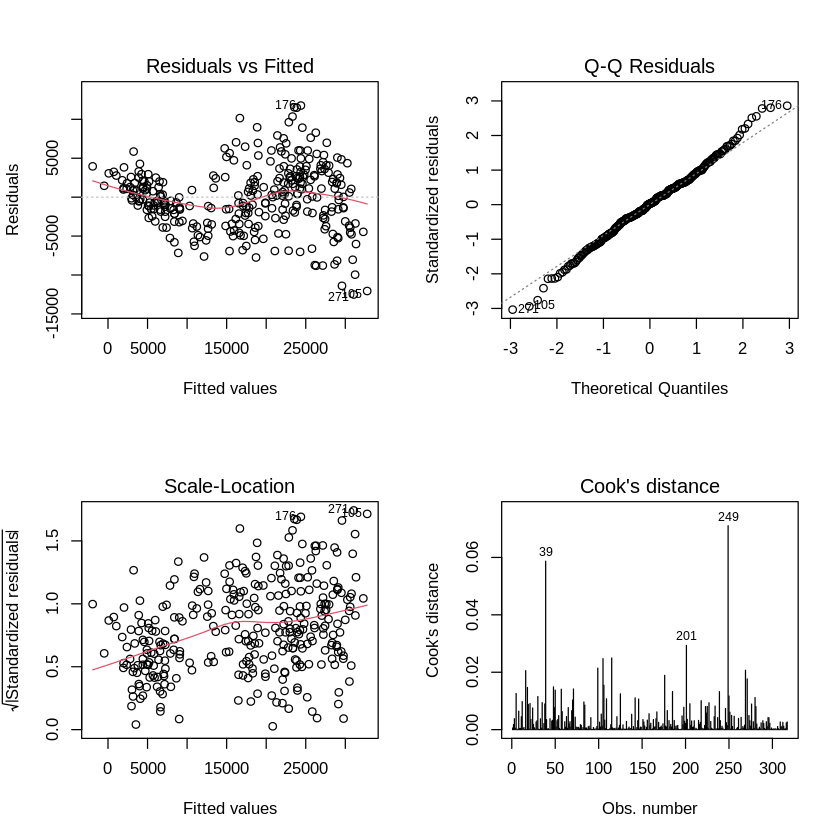

In [ ]:
par(mfrow=c(2,2))
plot(bike_weekend_model_final , which=1:4)

There is no outliers in the model’s residuals according to the Cook’s distance plot.

In [ ]:
# Evaluate homoscedasticity non-constant error variance test
ncvTest(bike_weekend_model_final)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 35.62784, Df = 1, p = 2.3885e-09

P-value is less than 0.05, implying that the constant error variance assumption is violated.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(bike_weekend_model_final)

 lag Autocorrelation D-W Statistic p-value
   1      -0.1132151      2.224318   0.056
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.

In [ ]:
# Test for Normally Distributed Errors
shapiro.test(bike_weekend_model_final$residuals)


	Shapiro-Wilk normality test

data:  bike_weekend_model_final$residuals
W = 0.99468, p-value = 0.3409


P-value of the normality test is greater than 0.05 and therefore, the residuals of the data is normally distributed. However, as the model failed the homoscedascity test, the model will be transformed using box-cox transformation method.

## BoxCox transformation

In [ ]:
bike_by_dayBC <- model4

for (i in colnames(bike_by_dayBC)){
  if(class(bike_by_dayBC[[i]]) == "integer" | class(bike_by_dayBC[[i]]) == "numeric"){
    bike_by_dayBC[i] <- bike_by_dayBC[i] + (abs(min(bike_by_day[i])))+1 #adding minimum value to make dataset positive
  }
}

bc1 <-boxTidwell(
  bike_by_dayBC$sum_bike_count ~ bike_by_dayBC$mean_humidity +
    bike_by_dayBC$mean_wind_speed +
    bike_by_dayBC$mean_dew_point_temp +
    bike_by_dayBC$mean_solar_radiation +
    bike_by_dayBC$mean_rainfall
  )

lambda_val=bc1$result[1]

transform_boxcox <- function(data)
{
  # box-cox transformation
  data = ((data^lambda_val)-1)/lambda_val
  return(data)
}

for (i in colnames(bike_by_dayBC)){
  if(class(bike_by_dayBC[[i]]) == "integer" | class(bike_by_dayBC[[i]]) == "numeric"){
    bike_by_dayBC[i] <- transform_boxcox(bike_by_dayBC[i])
  }
}

# fitting new model
bike_by_dayBC_fit = lm(bike_by_dayBC$sum_bike_count ~ bike_by_dayBC$mean_humidity +
    bike_by_dayBC$mean_wind_speed +
    bike_by_dayBC$mean_dew_point_temp +
    bike_by_dayBC$mean_solar_radiation +
    bike_by_dayBC$mean_rainfall +
    bike_by_dayBC$seasons +
    bike_by_dayBC$holiday +
    bike_by_dayBC$weekend)

summary(bike_by_dayBC_fit)


Call:
lm(formula = bike_by_dayBC$sum_bike_count ~ bike_by_dayBC$mean_humidity + 
    bike_by_dayBC$mean_wind_speed + bike_by_dayBC$mean_dew_point_temp + 
    bike_by_dayBC$mean_solar_radiation + bike_by_dayBC$mean_rainfall + 
    bike_by_dayBC$seasons + bike_by_dayBC$holiday + bike_by_dayBC$weekend)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1709 -0.5515  0.0273  0.5290  2.3787 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         19.4886     1.4987  13.004  < 2e-16 ***
bike_by_dayBC$mean_humidity         -0.8255     0.2858  -2.889 0.004146 ** 
bike_by_dayBC$mean_wind_speed       -1.0416     0.2930  -3.555 0.000438 ***
bike_by_dayBC$mean_dew_point_temp    1.0738     0.1442   7.449 9.67e-13 ***
bike_by_dayBC$mean_solar_radiation   3.4083     0.4194   8.128 1.10e-14 ***
bike_by_dayBC$mean_rainfall         -1.9489     0.2287  -8.520 7.35e-16 ***
bike_by_dayBC$seasonsSpring         -1.0351     0.1472  -

In [ ]:
# multicollinearity
car::vif(bike_by_dayBC_fit)

,GVIF,Df,GVIF^(1/(2*Df))
bike_by_dayBC$mean_humidity,3.607174,1,1.899256
bike_by_dayBC$mean_wind_speed,1.333563,1,1.154800
bike_by_dayBC$mean_dew_point_temp,5.928370,1,2.434824
bike_by_dayBC$mean_solar_radiation,3.391377,1,1.841569
bike_by_dayBC$mean_rainfall,1.693317,1,1.301275
bike_by_dayBC$seasons,4.499259,3,1.284863
bike_by_dayBC$holiday,1.046936,1,1.023199
bike_by_dayBC$weekend,1.025189,1,1.012516


The final transformed model with weekend can explain 86.3% of the data and is statistically accurate at 95% with p-value < 0.05. There is no mulicollinearity in the final model.

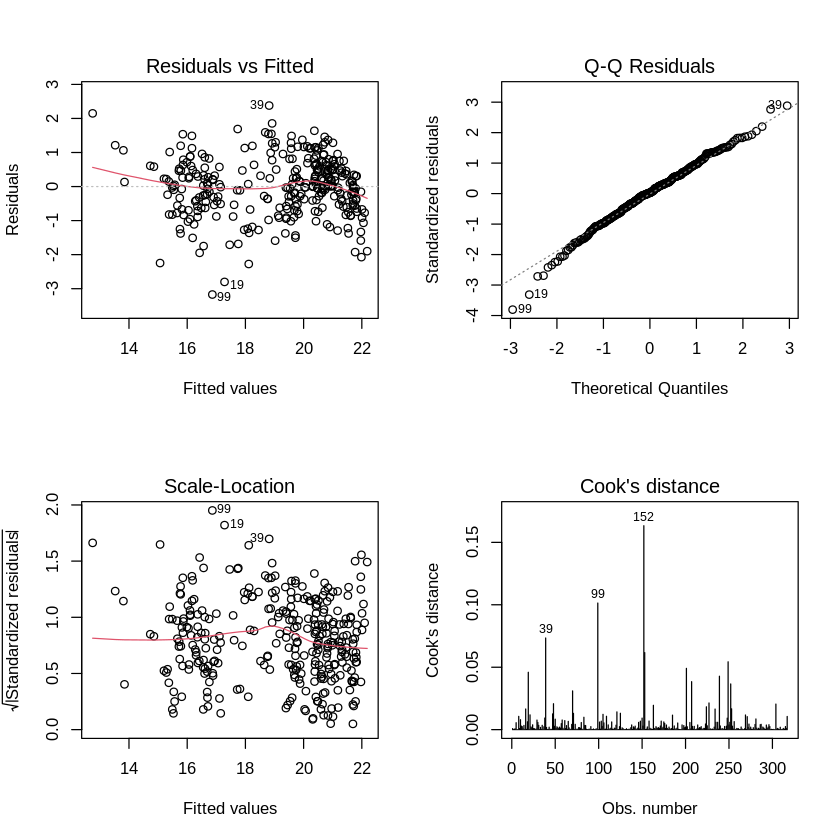

In [ ]:
par(mfrow=c(2,2))
plot(bike_by_dayBC_fit , which=1:4)

Cook’s distance shows that there are some outliers (152, 99 and 39) and therfore, they will be removed from the dataset before fitting it into the model again.

In [ ]:
# Evaluate homoscedasticity non-constant error variance test
ncvTest(bike_by_dayBC_fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 6.343005, Df = 1, p = 0.011785

P-value is less than 0.05, implying that the constant error variance assumption is violated if we do not remove the outliers. Therefore, these will be removed and then the model will be tested again.

### Final model 4

In [ ]:
bike_by_dayBC <- bike_by_dayBC[-c(152,99,39),]

# fitting new model
bike_by_dayBC_fit = lm(bike_by_dayBC$sum_bike_count ~ bike_by_dayBC$mean_humidity +
    bike_by_dayBC$mean_wind_speed +
    bike_by_dayBC$mean_dew_point_temp +
    bike_by_dayBC$mean_solar_radiation +
    bike_by_dayBC$mean_rainfall +
    bike_by_dayBC$seasons +
    bike_by_dayBC$holiday +
    bike_by_dayBC$weekend)

summary(bike_by_dayBC_fit)


Call:
lm(formula = bike_by_dayBC$sum_bike_count ~ bike_by_dayBC$mean_humidity + 
    bike_by_dayBC$mean_wind_speed + bike_by_dayBC$mean_dew_point_temp + 
    bike_by_dayBC$mean_solar_radiation + bike_by_dayBC$mean_rainfall + 
    bike_by_dayBC$seasons + bike_by_dayBC$holiday + bike_by_dayBC$weekend)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80853 -0.54398  0.02451  0.50972  1.71834 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         19.6022     1.4305  13.703  < 2e-16 ***
bike_by_dayBC$mean_humidity         -1.0221     0.2780  -3.676 0.000280 ***
bike_by_dayBC$mean_wind_speed       -0.9514     0.2799  -3.399 0.000766 ***
bike_by_dayBC$mean_dew_point_temp    1.2492     0.1493   8.366 2.21e-15 ***
bike_by_dayBC$mean_solar_radiation   3.3637     0.4012   8.383 1.96e-15 ***
bike_by_dayBC$mean_rainfall         -1.7471     0.2222  -7.863 6.63e-14 ***
bike_by_dayBC$seasonsSpring         -1.1297    

The final model with weekend can explain 87.69% of the data and is statistically accurate at 95% with p-value < 0.05. There is no mulicollinearity in the final model. This is by far a model with the most prediction accuracy.

In [ ]:
# multicollinearity
car::vif(bike_by_dayBC_fit)

,GVIF,Df,GVIF^(1/(2*Df))
bike_by_dayBC$mean_humidity,3.644442,1,1.909042
bike_by_dayBC$mean_wind_speed,1.308730,1,1.143998
bike_by_dayBC$mean_dew_point_temp,6.386343,1,2.527121
bike_by_dayBC$mean_solar_radiation,3.373157,1,1.836616
bike_by_dayBC$mean_rainfall,1.676241,1,1.294697
bike_by_dayBC$seasons,4.820642,3,1.299723
bike_by_dayBC$holiday,1.056871,1,1.028042
bike_by_dayBC$weekend,1.031407,1,1.015582


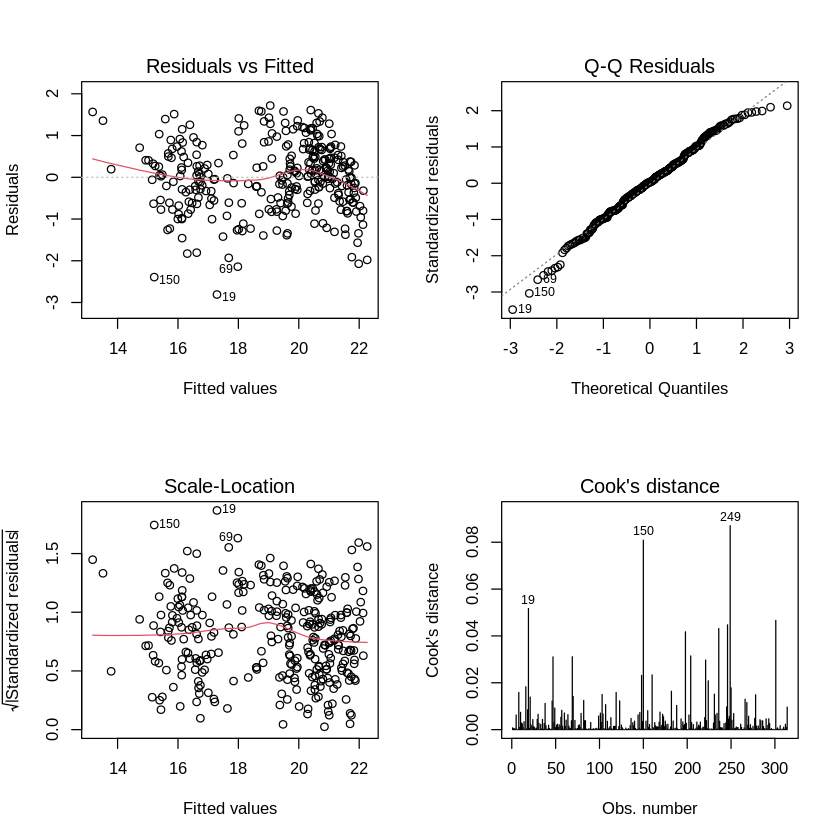

In [ ]:
par(mfrow=c(2,2))
plot(bike_by_dayBC_fit , which=1:4)

In [ ]:
# Evaluate homoscedasticity non-constant error variance test
ncvTest(bike_by_dayBC_fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.58038, Df = 1, p = 0.1082

After removing outliers, the P-value of non-constant error variance test shows that it is greater than 0.05, implying that the constant error variance assumption is not violated.

In [ ]:
# Test for Autocorrelated Errors
durbinWatsonTest(bike_by_dayBC_fit)

 lag Autocorrelation D-W Statistic p-value
   1     -0.04184489       2.07716   0.522
 Alternative hypothesis: rho != 0

P-value is greater than 0.05 and therefore, we cannot reject H0. The uncorrelated error assumption is not violated.

In [ ]:
# Test for Normally Distributed Errors
shapiro.test(bike_by_dayBC_fit$residuals)


	Shapiro-Wilk normality test

data:  bike_by_dayBC_fit$residuals
W = 0.9897, p-value = 0.02599


P-value of the normality test is less than 0.05 and therefore residuals are not normally distributed.